<a href="https://colab.research.google.com/github/rayan239/Computer_Vision/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd # reading and processing data
import seaborn as sns # visualization
import tensorflow as tf # models
import numpy as np
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



*** Data Preparation ***

In [155]:
data = pd.read_csv('/content/train.csv')

In [156]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [157]:
data.shape

(1000, 12)

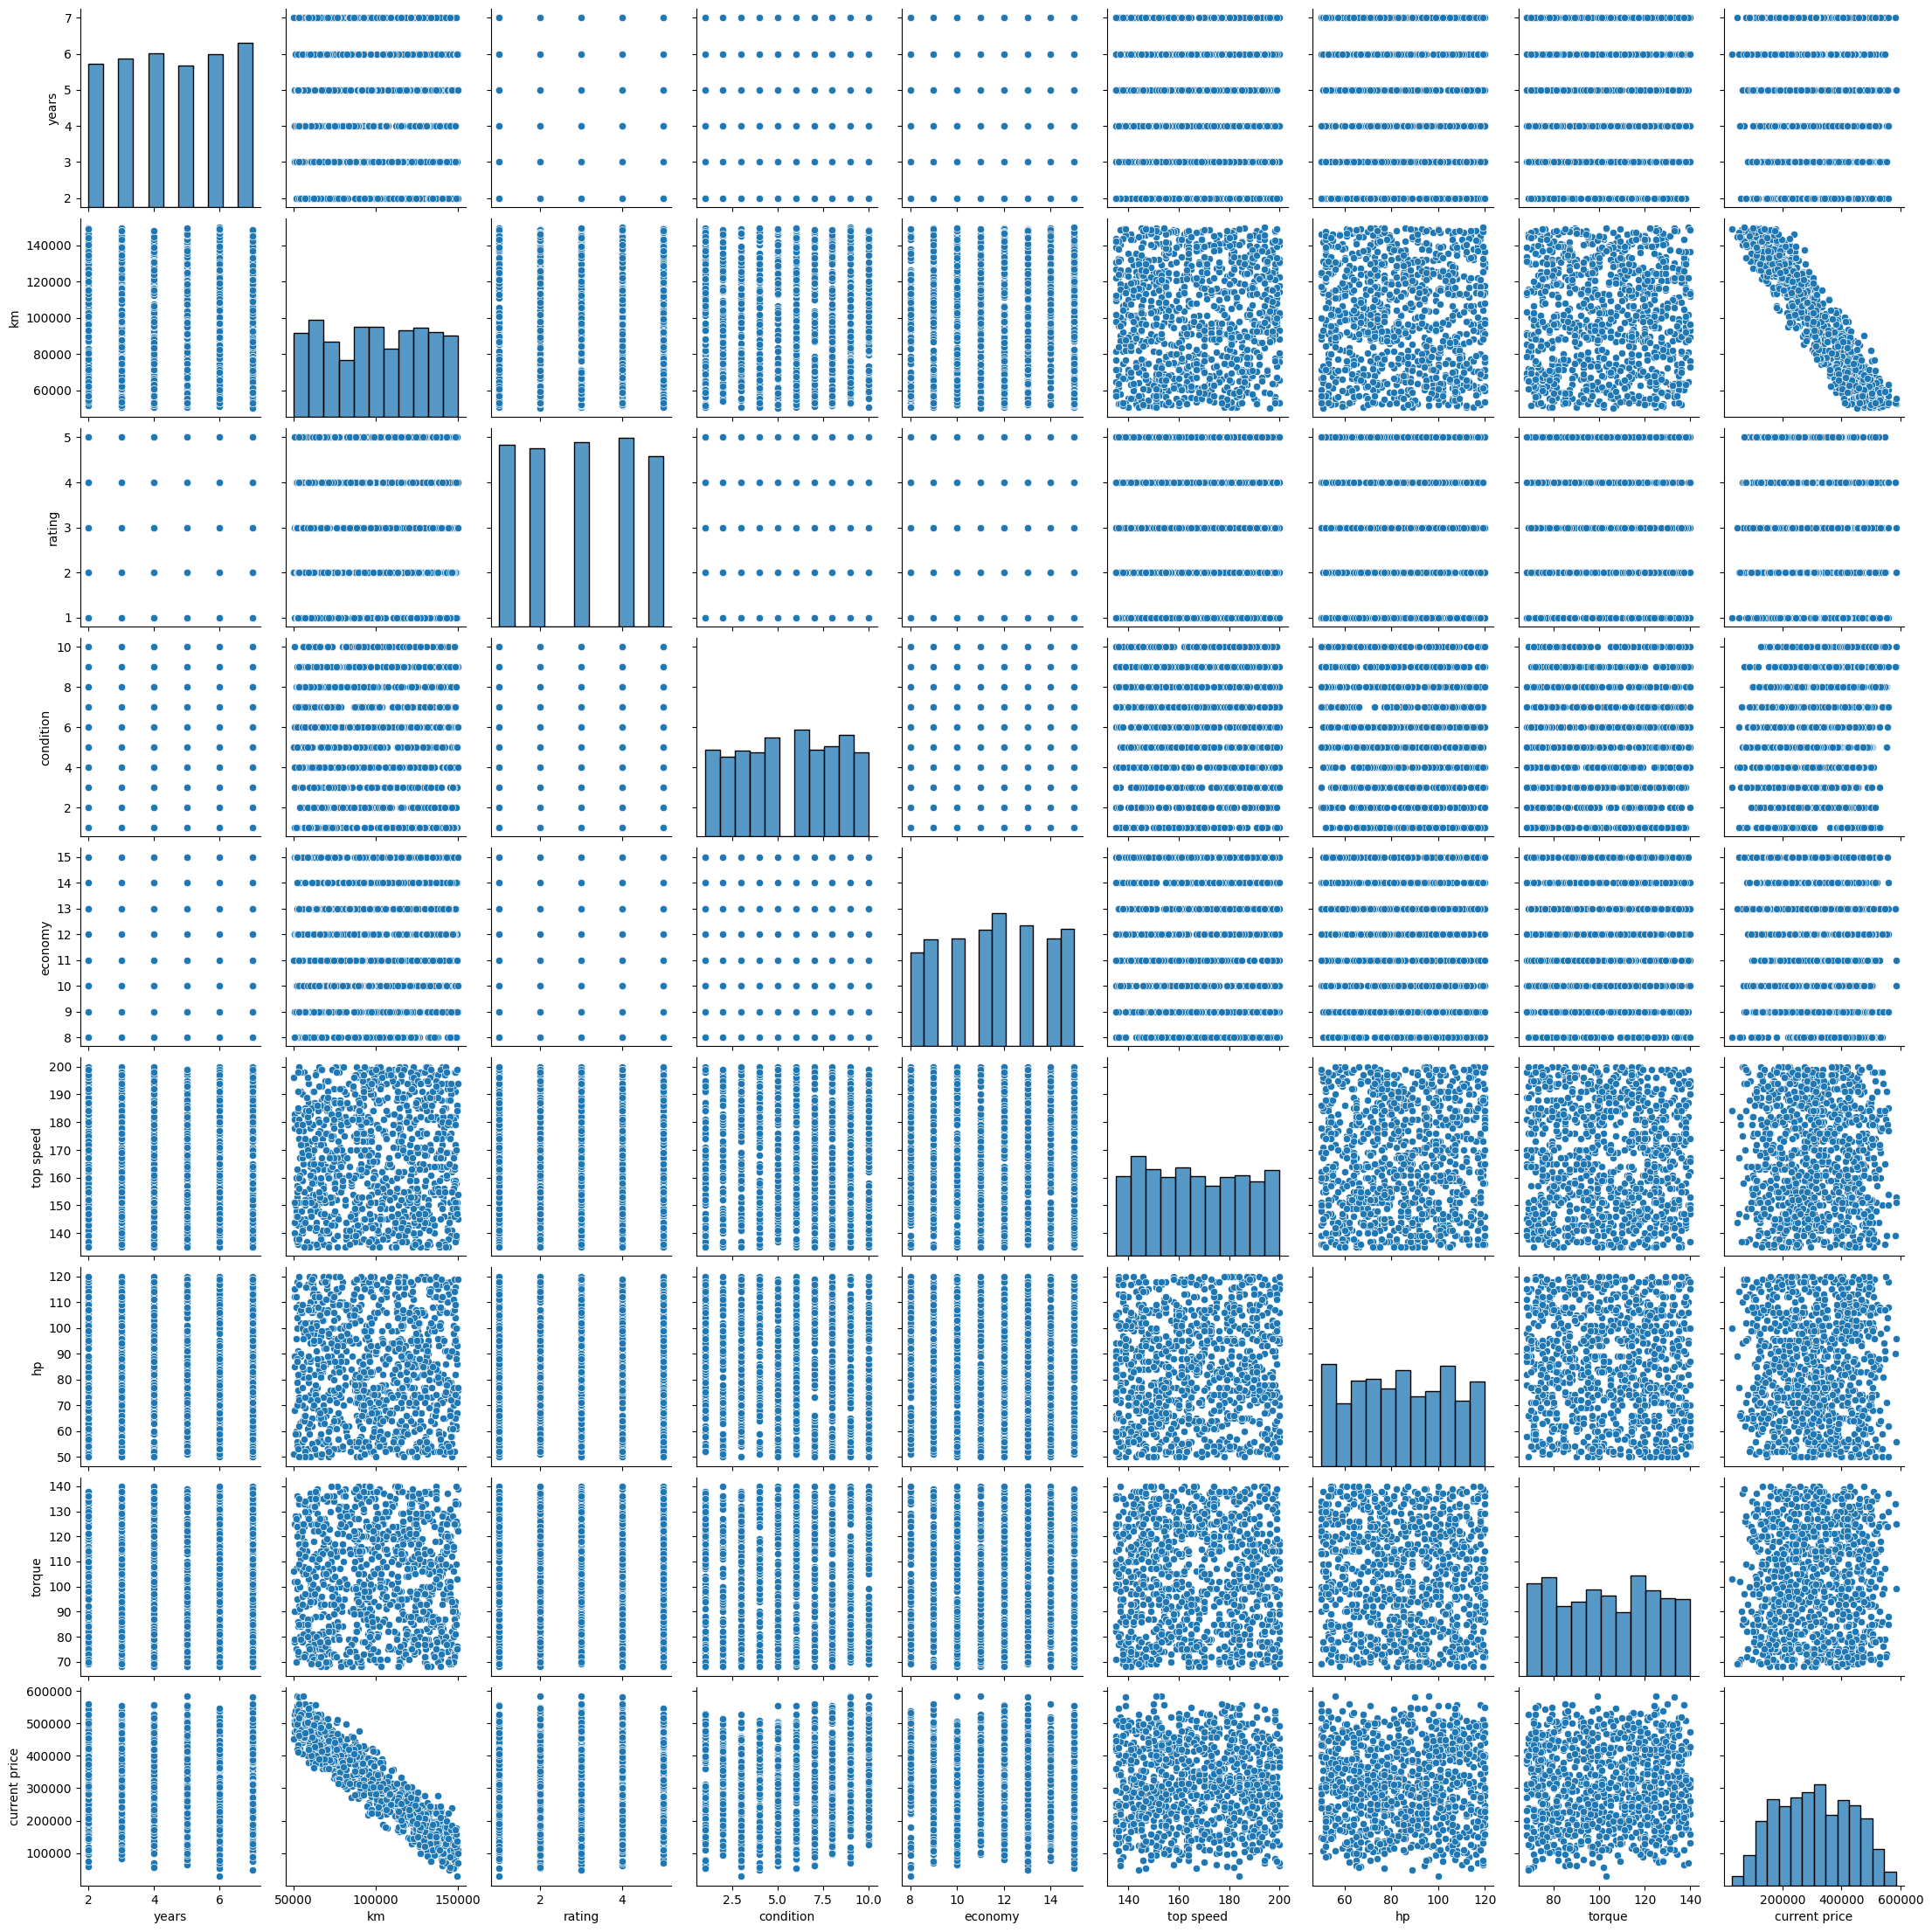

In [158]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']],)

In [197]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [198]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.200000e+02 5.663920e+05 8.233620e+05 6.000000e+00 1.012870e+05
  5.000000e+00 1.000000e+00 1.000000e+01 1.400000e+02 5.500000e+01
  7.400000e+01 2.875885e+05]
 [6.150000e+02 6.462500e+05 8.391090e+05 7.000000e+00 1.246670e+05
  5.000000e+00 5.000000e+00 1.500000e+01 1.630000e+02 5.300000e+01
  1.290000e+02 2.390180e+05]
 [2.840000e+02 6.361530e+05 7.205930e+05 2.000000e+00 1.274040e+05
  1.000000e+00 3.000000e+00 1.400000e+01 1.440000e+02 6.700000e+01
  1.180000e+02 1.691255e+05]
 [7.210000e+02 5.377380e+05 8.230310e+05 2.000000e+00 1.158700e+05
  3.000000e+00 6.000000e+00 1.200000e+01 1.370000e+02 7.700000e+01
  1.110000e+02 2.211325e+05]
 [9.720000e+02 6.446630e+05 7.982580e+05 6.000000e+00 1.086440e+05
  2.000000e+00 2.000000e+00 9.000000e+00 1.550000e+02 6.700000e+01
  1.360000e+02 2.832480e+05]], shape=(5, 12), dtype=float32)


In [199]:
x = tensor_data[:,3:-1]
print(x.shape)
print(x)

(1000, 8)
tf.Tensor(
[[6.00000e+00 1.01287e+05 5.00000e+00 ... 1.40000e+02 5.50000e+01
  7.40000e+01]
 [7.00000e+00 1.24667e+05 5.00000e+00 ... 1.63000e+02 5.30000e+01
  1.29000e+02]
 [2.00000e+00 1.27404e+05 1.00000e+00 ... 1.44000e+02 6.70000e+01
  1.18000e+02]
 ...
 [4.00000e+00 1.15323e+05 2.00000e+00 ... 1.42000e+02 5.60000e+01
  1.29000e+02]
 [5.00000e+00 6.30200e+04 4.00000e+00 ... 1.86000e+02 8.20000e+01
  9.50000e+01]
 [2.00000e+00 8.75060e+04 5.00000e+00 ... 1.85000e+02 9.50000e+01
  1.10000e+02]], shape=(1000, 8), dtype=float32)


In [200]:
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis=-1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[287588.5]
 [239018. ]
 [169125.5]
 [221132.5]
 [283248. ]], shape=(5, 1), dtype=float32)


In [201]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)
print(DATASET_SIZE)

1000


In [202]:
x_train = x[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape,y_train.shape)

(800, 8) (800, 1)


In [209]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE) # prefetch => train + load simantaneously

In [166]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[4.00000e+00 9.92070e+04 4.00000e+00 2.00000e+00 1.40000e+01 1.60000e+02
  6.40000e+01 1.00000e+02]
 [3.00000e+00 6.04140e+04 3.00000e+00 5.00000e+00 1.20000e+01 1.64000e+02
  1.10000e+02 7.20000e+01]
 [6.00000e+00 1.18013e+05 1.00000e+00 6.00000e+00 1.40000e+01 1.51000e+02
  6.20000e+01 8.30000e+01]
 [3.00000e+00 6.21770e+04 2.00000e+00 6.00000e+00 1.20000e+01 1.60000e+02
  7.00000e+01 1.32000e+02]
 [6.00000e+00 6.61330e+04 3.00000e+00 5.00000e+00 1.00000e+01 1.52000e+02
  1.05000e+02 1.27000e+02]
 [6.00000e+00 1.19737e+05 2.00000e+00 9.00000e+00 1.10000e+01 1.55000e+02
  8.00000e+01 1.19000e+02]
 [4.00000e+00 5.05120e+04 2.00000e+00 6.00000e+00 8.00000e+00 1.44000e+02
  6.80000e+01 7.90000e+01]
 [6.00000e+00 5.75430e+04 1.00000e+00 5.00000e+00 9.00000e+00 1.72000e+02
  9.90000e+01 1.05000e+02]
 [5.00000e+00 6.29180e+04 4.00000e+00 6.00000e+00 1.00000e+01 1.74000e+02
  1.12000e+02 1.32000e+02]
 [2.00000e+00 6.16120e+04 1.00000e+00 5.00000e+00 9.00000e+00 1.52000e+02
  5.40

In [203]:
x_val = x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape,y_val.shape)

(100, 8) (100, 1)


In [210]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [204]:
x_test = x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape,y_test.shape)

(100, 8) (100, 1)


In [211]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [205]:
normalizer = Normalization() # axis=-1(column wise), mean, std
normalizer.adapt(x_train) # (xi-mean)/std
normalizer(x_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.86253273,  0.01937331,  1.4028102 , -1.611216  , -0.7264565 ,
        -1.4014114 , -1.4509777 , -1.3873538 ],
       [ 1.4473008 ,  0.82731843,  1.4028102 , -0.19864306,  1.4985256 ,
        -0.21333708, -1.5476007 ,  1.223912  ],
       [-1.4765393 ,  0.9219012 , -1.4240116 , -0.9049295 ,  1.0535291 ,
        -1.1947898 , -0.8712388 ,  0.70165884],
       [-1.4765393 ,  0.52331954, -0.01060066,  0.15450016,  0.16353633,
        -1.5563776 , -0.38812318,  0.36931595],
       [ 0.86253273,  0.27360994, -0.71730614, -1.2580727 , -1.171453  ,
        -0.6265803 , -0.8712388 ,  1.556255  ]], dtype=float32)>

In [206]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(1),
],name="first-model")
# model.build(input_shape=(None, x.shape[-1]))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "first-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

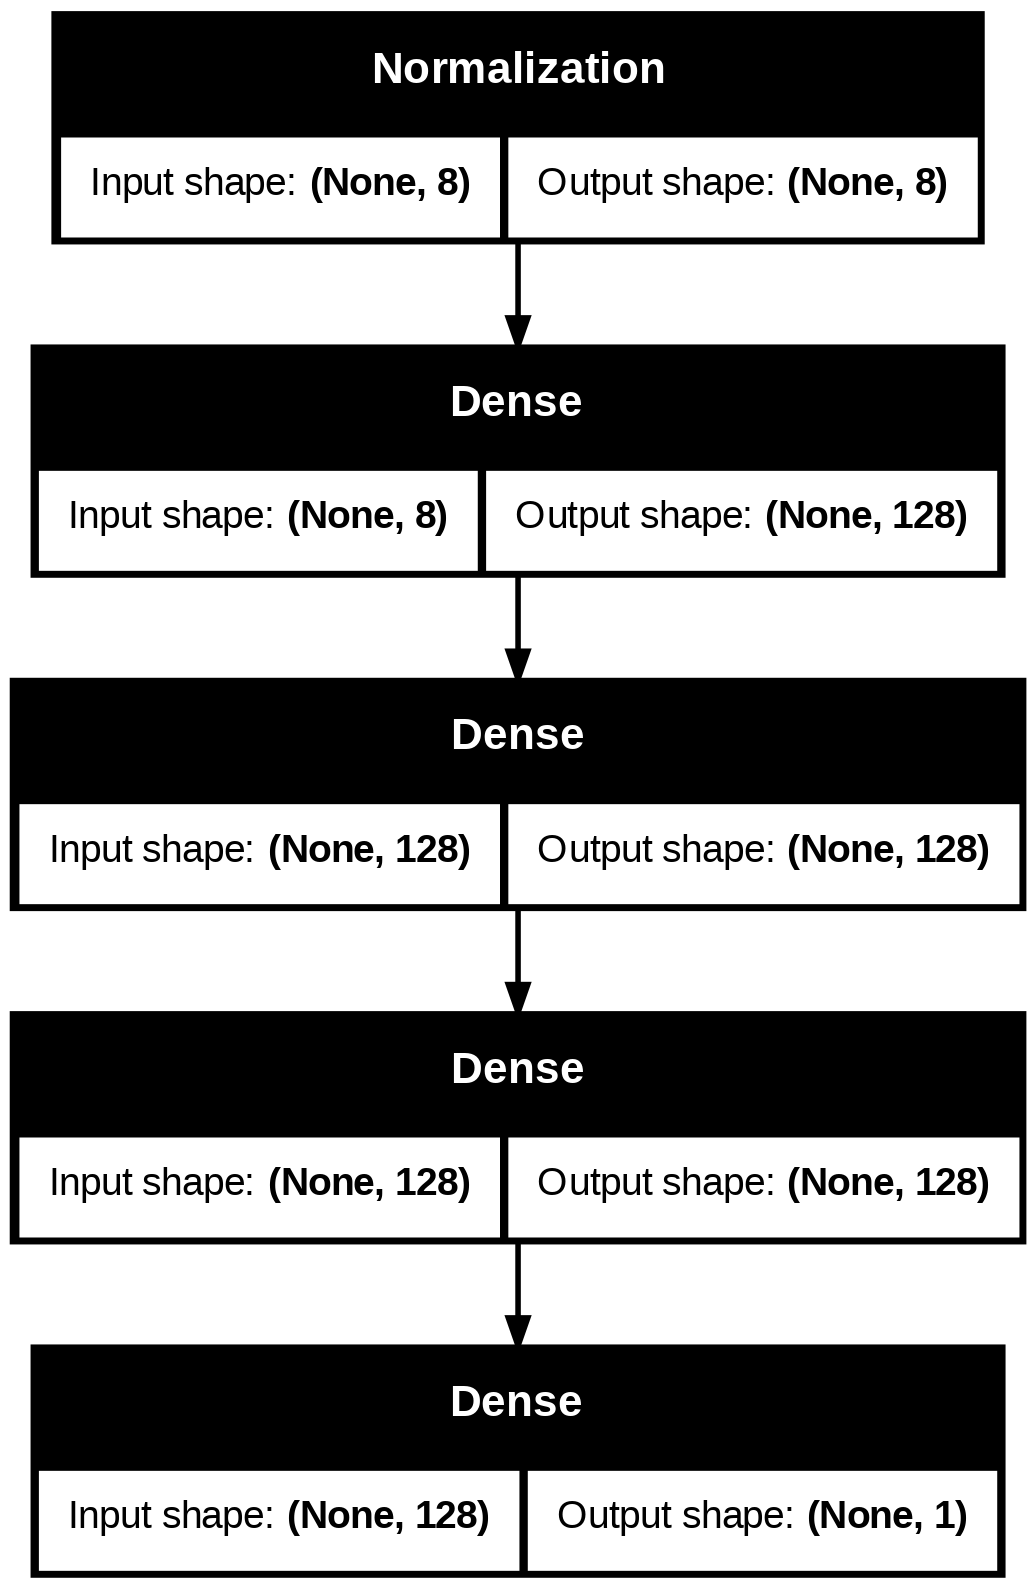

In [207]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True)

In [208]:
model.compile(optimizer = Adam(learning_rate=0.1),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()])

In [212]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1) # Use SGD , epochs means how many time m and c will update

# w = w - LR * (dl/dw) || w = m, c

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 226923.5781 - root_mean_squared_error: 262855.1562 - val_loss: 66297.7734 - val_root_mean_squared_error: 80794.0625
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62108.3633 - root_mean_squared_error: 76449.0547 - val_loss: 48816.7461 - val_root_mean_squared_error: 58568.5859
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43805.6055 - root_mean_squared_error: 54670.7969 - val_loss: 45772.6562 - val_root_mean_squared_error: 55310.1875
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40560.5156 - root_mean_squared_error: 50728.3555 - val_loss: 56883.5391 - val_root_mean_squared_error: 68249.7188
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44581.1602 - root_mean_squared_error: 55681.6836 - val_loss: 50499.2656 - val_root_mean_squared_error: 62508.5781
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46175.7266 - root_mean_squared_error: 58023.2148 - val_loss: 41773.8828 - 

In [213]:
history.history

{'loss': [154252.875,
  55316.515625,
  43118.73828125,
  42056.9296875,
  42218.61328125,
  44088.80078125,
  43608.171875,
  43623.8046875,
  44834.171875,
  40322.92578125,
  39999.171875,
  37270.61328125,
  39918.69921875,
  38543.80859375,
  40788.765625,
  37541.57421875,
  37399.4765625,
  38835.59375,
  38551.47265625,
  35910.7265625,
  35905.1875,
  36084.296875,
  39164.2109375,
  38871.64453125,
  37899.62109375,
  41100.8828125,
  36426.0390625,
  37415.87109375,
  38357.23828125,
  38114.640625,
  38980.72265625,
  38522.11328125,
  35814.21875,
  35114.984375,
  38448.21875,
  37246.9765625,
  38292.39453125,
  41583.18359375,
  37086.80859375,
  35212.84765625,
  34979.4609375,
  35393.87109375,
  35158.87109375,
  35505.1640625,
  34874.22265625,
  34882.625,
  35831.87890625,
  35473.41015625,
  35676.015625,
  37184.90234375,
  36762.33203125,
  35211.1015625,
  36094.00390625,
  34934.953125,
  35618.05859375,
  36246.90625,
  34205.74609375,
  34937.48828125,
  35

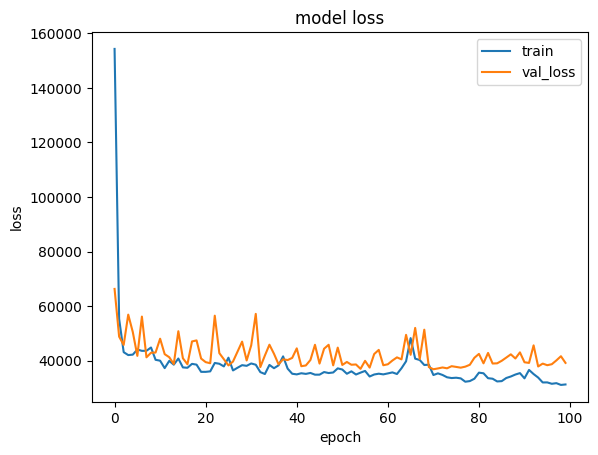

In [214]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

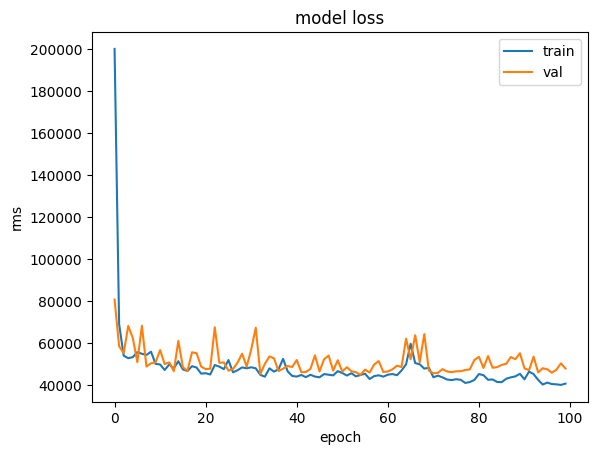

In [215]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model loss')
plt.ylabel('rms')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [216]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37165.0938 - root_mean_squared_error: 44694.6055 


[37490.04296875, 45076.296875]

In [217]:
x_test.shape

TensorShape([100, 8])

In [218]:
model.predict(tf.expand_dims(x_test[0],axis = 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[135392.64]], dtype=float32)

In [219]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([107147.5], dtype=float32)>

In [220]:
y_true = list(y_test[:,0].numpy())

In [221]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[np.float32(135392.64), np.float32(359034.7), np.float32(345244.6), np.float32(153060.23), np.float32(163483.7), np.float32(436507.4), np.float32(247954.3), np.float32(490218.4), np.float32(407864.78), np.float32(388559.6), np.float32(150311.92), np.float32(303491.84), np.float32(368645.4), np.float32(470787.9), np.float32(367307.84), np.float32(410682.62), np.float32(483274.0), np.float32(527129.3), np.float32(509997.38), np.float32(306184.47), np.float32(305260.47), np.float32(475092.2), np.float32(458483.6), np.float32(398417.78), np.float32(606963.5), np.float32(501737.78), np.float32(278169.2), np.float32(458444.06), np.float32(439636.6), np.float32(448446.25), np.float32(256026.55), np.float32(322613.12), np.float32(253916.52), np.float32(196729.52), np.float32(449090.2), np.float32(374609.97), np.float32(125078.47), np.float32(220156.08), np.float32(127905.72), np.float32(356811.44), np.float32(500945.0), np.float32(370876.78), np.float32(38

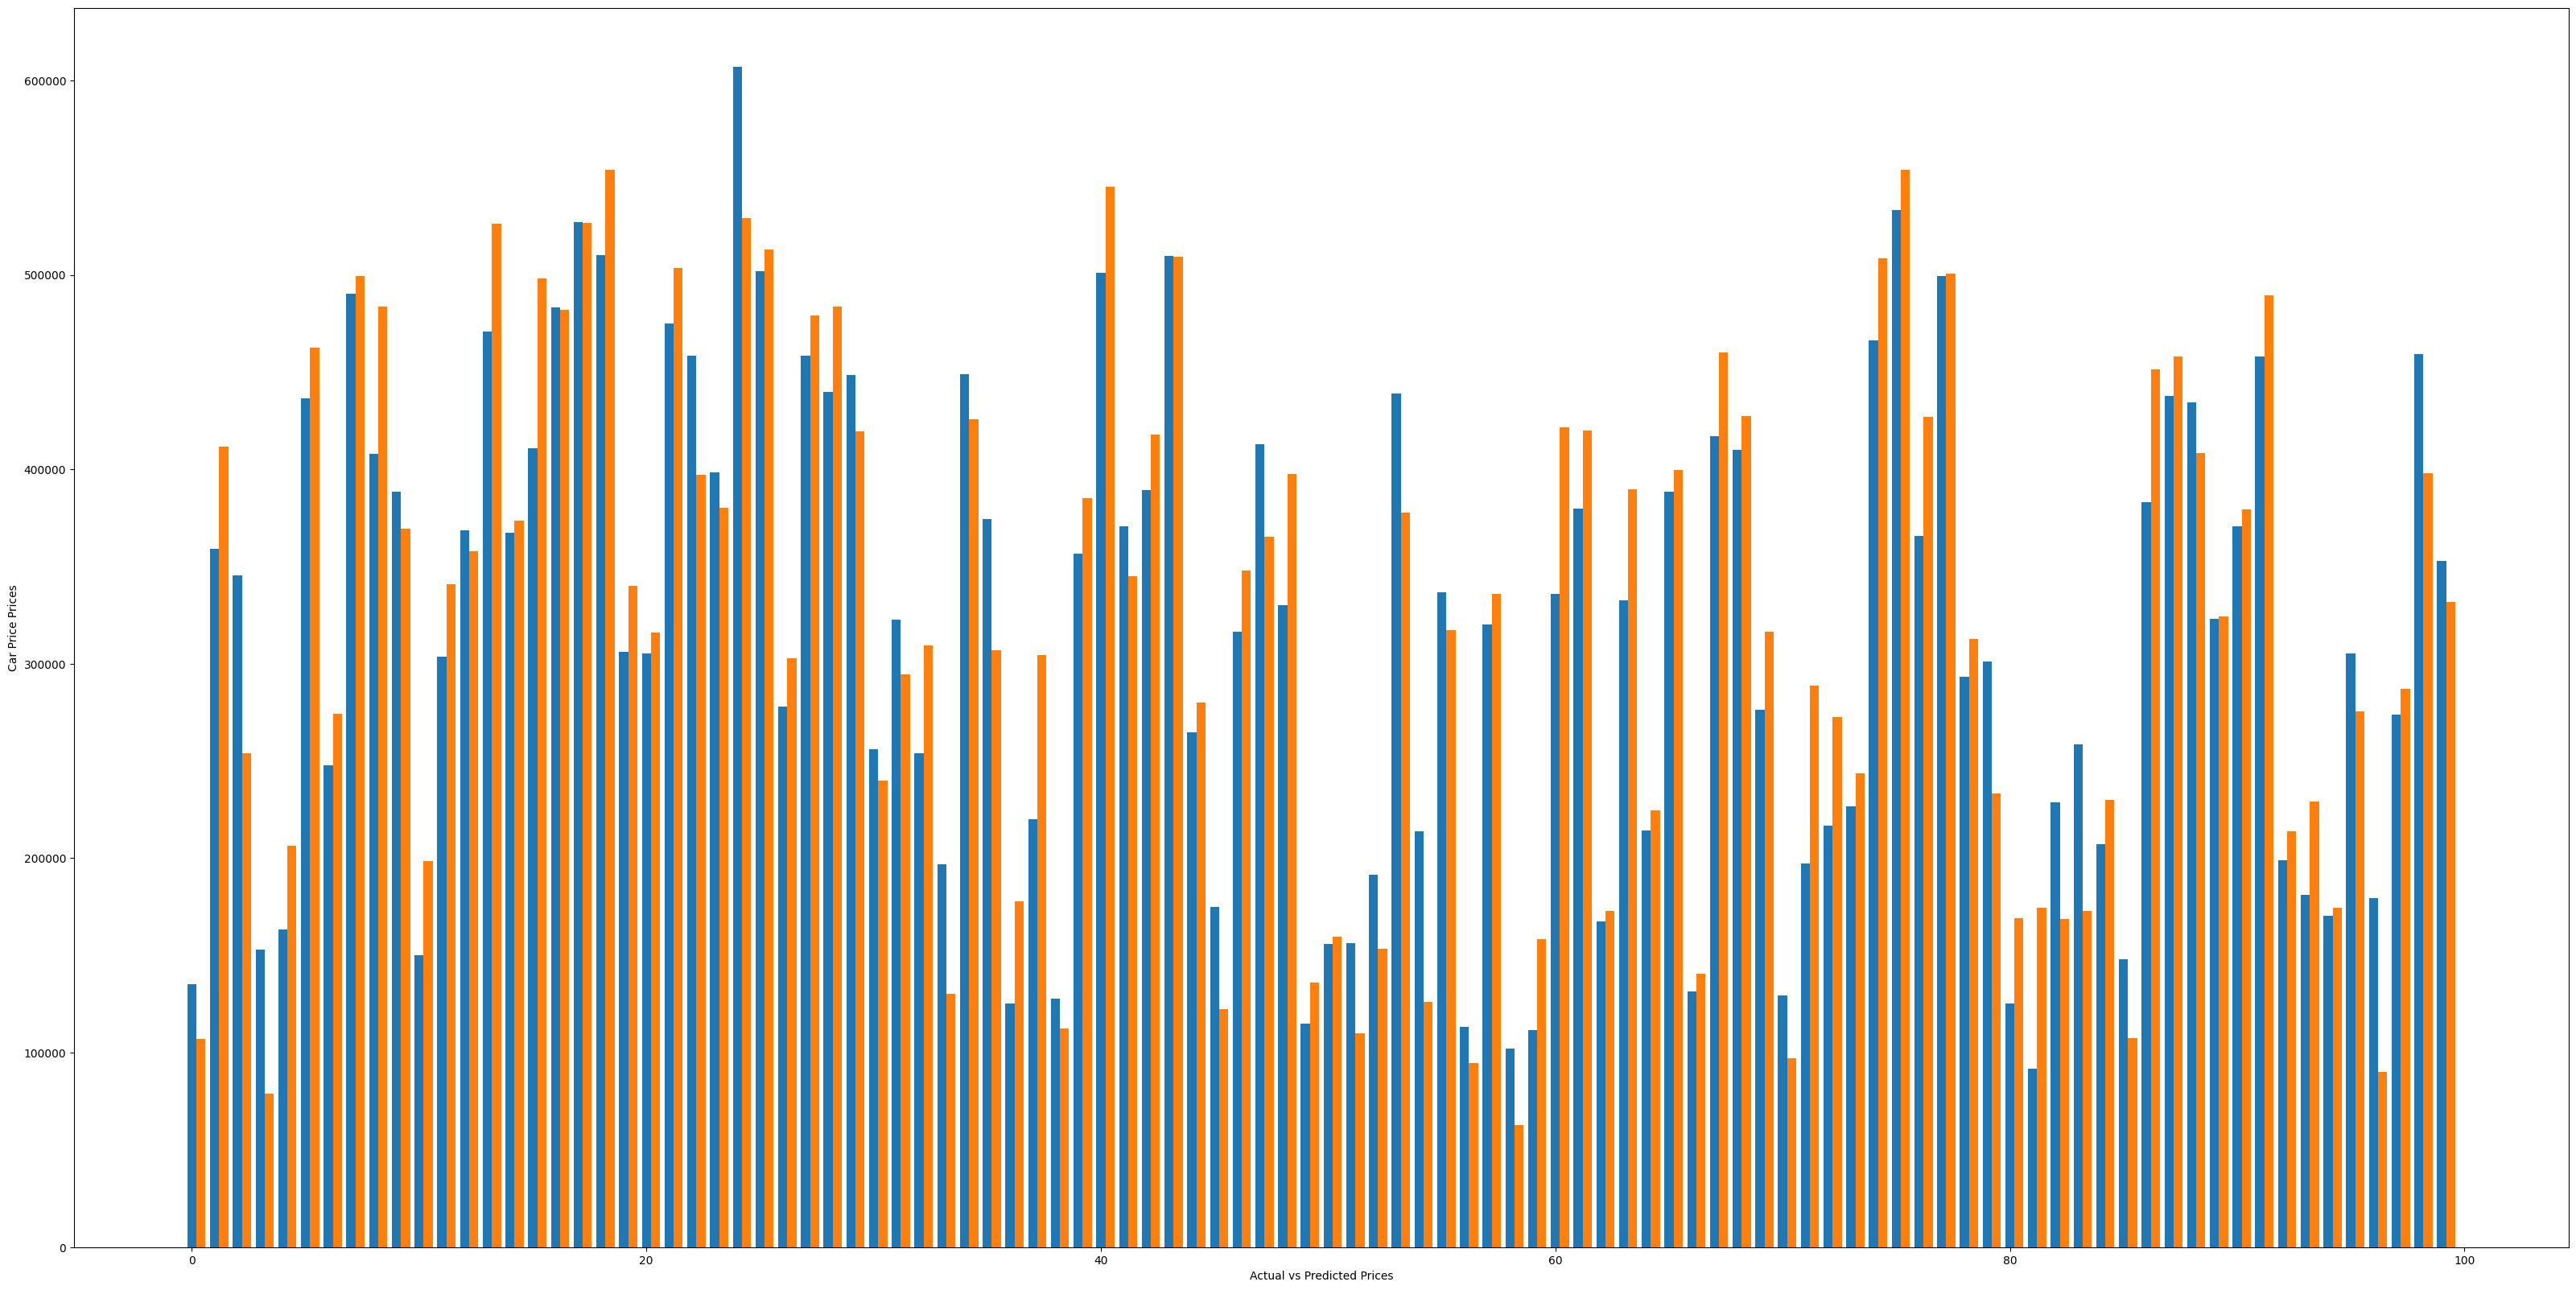

In [222]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.4

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

# See you not for mind